In [85]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import glob
import os
import re
from shutil import copyfile
import seaborn as sns
from collections import Counter
%matplotlib inline

In [2]:
import pyrosetta as py
py.init()

PyRosetta-4 2021 [Rosetta PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python37.Release 2021.07+release.c48be2695c4ba637c6fa19ee5d289fd9a8aa99ef 2021-02-21T11:50:06] retrieved from: http://www.pyrosetta.org
(C) Copyright Rosetta Commons Member Institutions. Created in JHU by Sergey Lyskov and PyRosetta Team.
core.init: {0} Checking for fconfig files in pwd and ./rosetta/flags
core.init: {0} Rosetta version: PyRosetta4.conda.linux.cxx11thread.serialization.CentOS.python37.Release r275 2021.07+release.c48be26 c48be2695c4ba637c6fa19ee5d289fd9a8aa99ef http://www.pyrosetta.org 2021-02-21T11:50:06
core.init: {0} command: PyRosetta -ex1 -ex2aro -database /software/conda/envs/pyrosetta/lib/python3.7/site-packages/pyrosetta/database
basic.random.init_random_generator: {0} 'RNG device' seed mode, using '/dev/urandom', seed=-1367851671 seed_offset=0 real_seed=-1367851671 thread_index=0
basic.random.init_random_generator: {0} RandomGenerator:init: Normal mode, seed=-1367851671 RG_type=m

In [2]:
df = pd.read_pickle('../picked_networks.pickle')
df.shape

(3519, 4)

In [3]:
print(df)

                                     tyrs  n_res_network  n_hbonds  \
description                                                          
0_input_0011_0002_7_0004_0010_0009    1.0            7.0       7.0   
0_input_0011_0005_10_0010_0007_0006   1.0            7.0       7.0   
0_input_0011_0005_7_0002_0005_0002    1.0            6.0       7.0   
0_input_0011_0005_7_0002_0005_0003    1.0            6.0       6.0   
0_input_0011_0005_7_0002_0005_0004    1.0            6.0       7.0   
0_input_0011_0005_7_0002_0005_0006    1.0            6.0       7.0   
0_input_0011_0005_7_0002_0005_0008    1.0            6.0       7.0   
0_input_0011_0005_7_0004_0010         1.0            4.0       4.0   
0_input_0011_0005_7_0010_0008_0002    1.0            5.0       6.0   
0_input_0011_0005_7_0010_0008_0007    1.0            6.0       6.0   
0_input_0027_0002_4_0001_0006_0003    1.0            5.0       5.0   
0_input_0027_0002_4_0001_0006_0009    1.0            7.0       7.0   
0_input_0027_0002_4_

In [ ]:
print(glob.glob('*_input_*/score.sc'))

In [4]:
dall_scores = pd.concat([pd.read_csv(f, sep='\s+', header=1) for f in glob.glob('*_input_*/score.sc')], ignore_index = True)
print(dall_scores)

       SCORE:  total_score  angle_constraint  atom_pair_constraint  \
0      SCORE:    -1199.074               0.0                   0.0   
1      SCORE:    -1204.404               0.0                   0.0   
2      SCORE:    -1199.048               0.0                   0.0   
3      SCORE:    -1200.037               0.0                   0.0   
4      SCORE:    -1200.007               0.0                   0.0   
5      SCORE:    -1195.340               0.0                   0.0   
6      SCORE:    -1196.305               0.0                   0.0   
7      SCORE:    -1193.461               0.0                   0.0   
8      SCORE:    -1200.798               0.0                   0.0   
9      SCORE:    -1201.852               0.0                   0.0   
10     SCORE:    -1215.352               0.0                   0.0   
11     SCORE:    -1215.154               0.0                   0.0   
12     SCORE:    -1217.107               0.0                   0.0   
13     SCORE:    -12

In [5]:
dscore_per_design = pd.DataFrame()
dscore_per_design = dscore_per_design.append([pd.read_csv(f, sep='\s+', header=1).mean() for f in glob.glob('*_input_*/score.sc')], ignore_index = True)


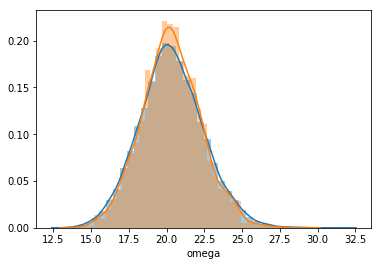

In [6]:
sns.distplot(dall_scores["omega"], bins=40)
sns.distplot(dscore_per_design["omega"], bins=40)

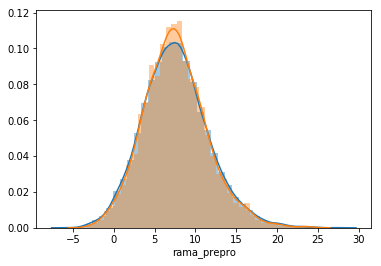

In [7]:
sns.distplot(dall_scores["rama_prepro"], bins=40)
sns.distplot(dscore_per_design["rama_prepro"], bins=40)

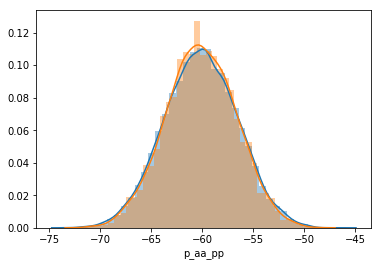

In [8]:
sns.distplot(dall_scores["p_aa_pp"], bins=40)
sns.distplot(dscore_per_design["p_aa_pp"], bins=40)

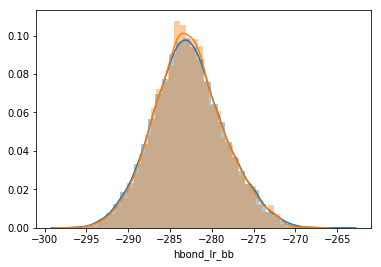

In [9]:
sns.distplot(dall_scores["hbond_lr_bb"], bins=40)
sns.distplot(dscore_per_design["hbond_lr_bb"], bins=40)

In [10]:
hbond_dict = {}
for index,row in df.iterrows():
    hbonds = []
#    my_regex = r"\# " + index + r"_0001_native_network_[1-9].cst\n\# \n"
#    cst = re.split(my_regex,row["network_cst"])
    cst = row["network_cst"]
    lines = cst.split('\n')
    for line in lines:      
        if line != "" and "AtomPair " in line:
            tyr_10 = False
            tyr_96 = False          
            acc_res = int(line.split()[2])
            don_res = int(line.split()[4])
            acc_atm = line.split()[1]
            don_atm = line.split()[3]
            if " OH  10 " in line:
                tyr_10 = True
            if " OH  96 " in line:
                tyr_96 = True           
            if acc_atm not in ["CB","N","CA","O"] and don_atm not in ["CB","N","CA","O"]:
                hbonds.append((acc_res,don_res,acc_atm,don_atm,tyr_10,tyr_96))
    hbond_dict[index] = hbonds
print(hbond_dict)

{'32_input_0059_0005_11_0010_0006_0006': [(96, 128, 'OH', 'NE2', False, True), (130, 96, 'OE1', 'OH', False, True), (130, 98, 'OE2', 'NZ', False, False), (128, 118, 'OE1', 'NH1', False, False), (146, 118, 'OD2', 'NH1', False, False), (146, 118, 'OD2', 'NH2', False, False), (146, 156, 'OD1', 'OG1', False, False)], '52_input_0043_0001_16_0002_0003_0009': [(96, 128, 'OH', 'NE2', False, True), (130, 96, 'OE1', 'OH', False, True), (130, 98, 'OE1', 'NZ', False, False), (130, 98, 'OE2', 'NZ', False, False), (128, 156, 'OE1', 'NZ', False, False), (146, 156, 'OE2', 'NZ', False, False)], '109_input_0001_0003_7_0006_0001_0010': [(84, 86, 'OE1', 'NE1', False, False), (84, 128, 'OE2', 'NH2', False, False), (96, 128, 'OH', 'NE', False, True), (96, 128, 'OH', 'NH2', False, True), (130, 96, 'OD2', 'OH', False, True), (112, 98, 'OE2', 'NH2', False, False), (130, 98, 'OD2', 'NE', False, False), (130, 98, 'OD1', 'NH2', False, False), (112, 134, 'OE1', 'ND2', False, False)], '52_input_0043_0001_16_0002_00

In [ ]:
hbond_set = py.rosetta.core.scoring.hbonds.HBondSet()
dretained = pd.DataFrame(columns=['%_retained','%_retained_tyr'])

for index,row in df.iterrows():
    interactions = hbond_dict[row["description"]]
    interact_res = Counter([inter[0:2] for inter in interactions])
    interact_res_tyr = Counter([inter[0:2] for inter in interactions if True in inter])
    num_interactions = float(len(list(interact_res.elements())))
    num_interactions_tyr = float(len(list(interact_res_tyr.elements())))
    curr_retention = []
    curr_retention_tyr = []
    for pdb in glob.glob(row["description"] + "/" + row["description"] + "_*.pdb"):
        current_inter_list = []
        pose = py.pose_from_pdb(pdb)
        pose.update_residue_neighbors()
        py.rosetta.core.scoring.hbonds.fill_hbond_set(pose, False, hbond_set)
        for i in range(1, hbond_set.nhbonds()+1):
            if hbond_set.hbond(i).acc_atm_is_backbone() == False and hbond_set.hbond(i).don_hatm_is_backbone() == False:
                current_inter_list.append((hbond_set.hbond(i).acc_res(),hbond_set.hbond(i).don_res()))
        current_inter = Counter(current_inter_list)
        num_curr_inter = 0.0
        num_curr_inter_tyr = 0.0
        for inter in current_inter:
            if inter in interact_res:
                if current_inter[inter] >= interact_res[inter]:
                    num_curr_inter += interact_res[inter]
                elif current_inter[inter] < interact_res[inter]:
                    num_curr_inter += current_inter[inter]
                    
            if inter in interact_res_tyr:
                if current_inter[inter] >= interact_res_tyr[inter]:
                    num_curr_inter_tyr += interact_res_tyr[inter]
                elif current_inter[inter] < interact_res_tyr[inter]:
                    num_curr_inter_tyr += current_inter[inter]
        curr_retention.append(num_curr_inter/num_interactions)
        curr_retention_tyr.append(num_curr_inter_tyr/num_interactions_tyr)
    dretained.loc[index] = [sum(curr_retention)/len(curr_retention), sum(curr_retention_tyr)/len(curr_retention_tyr)]
print(dretained)
        
        
#                        print(pose.residue(hbond_set.hbond(i).don_res()).atom_name(pose.residue(hbond_set.hbond(i).don_res()).first_adjacent_heavy_atom(hbond_set.hbond(i).don_hatm())))
                

In [8]:
dretained.to_pickle('networks_hbond_retention.pickle')

In [12]:
dretained = pd.read_csv('networks_hbond_retention.csv', header=0, index_col=0)

In [13]:
print(dretained)

                                     %_retained  %_retained_tyr
0_input_0011_0002_7_0004_0010_0009     0.776433        1.000000
0_input_0011_0005_10_0010_0007_0006    0.394022        0.513587
0_input_0011_0005_7_0002_0005_0002     0.350922        0.441441
0_input_0011_0005_7_0002_0005_0003     0.279744        0.401180
0_input_0011_0005_7_0002_0005_0004     0.347468        0.443804
0_input_0011_0005_7_0002_0005_0006     0.295455        0.383523
0_input_0011_0005_7_0002_0005_0008     0.310359        0.412281
0_input_0011_0005_7_0004_0010          0.359327        0.428135
0_input_0011_0005_7_0010_0008_0002     0.341646        0.528678
0_input_0011_0005_7_0010_0008_0007     0.202820        0.362256
0_input_0027_0002_4_0001_0006_0003     0.402993        0.441397
0_input_0027_0002_4_0001_0006_0009     0.553035        0.461373
0_input_0027_0002_4_0008_0006          0.317531        0.400000
0_input_0027_0002_4_0008_0006_0001     0.340637        0.485240
0_input_0027_0002_4_0008_0006_0004     0

In [14]:
dnetworks = pd.concat([dretained, df], axis=1)
print(dnetworks)

                                     %_retained  %_retained_tyr  tyrs  \
description                                                             
0_input_0011_0002_7_0004_0010_0009     0.776433        1.000000   1.0   
0_input_0011_0005_10_0010_0007_0006    0.394022        0.513587   1.0   
0_input_0011_0005_7_0002_0005_0002     0.350922        0.441441   1.0   
0_input_0011_0005_7_0002_0005_0003     0.279744        0.401180   1.0   
0_input_0011_0005_7_0002_0005_0004     0.347468        0.443804   1.0   
0_input_0011_0005_7_0002_0005_0006     0.295455        0.383523   1.0   
0_input_0011_0005_7_0002_0005_0008     0.310359        0.412281   1.0   
0_input_0011_0005_7_0004_0010          0.359327        0.428135   1.0   
0_input_0011_0005_7_0010_0008_0002     0.341646        0.528678   1.0   
0_input_0011_0005_7_0010_0008_0007     0.202820        0.362256   1.0   
0_input_0027_0002_4_0001_0006_0003     0.402993        0.441397   1.0   
0_input_0027_0002_4_0001_0006_0009     0.553035    

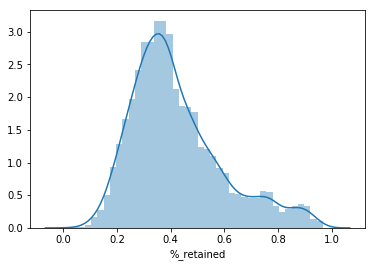

In [15]:
sns.distplot(dnetworks["%_retained"], bins=40)

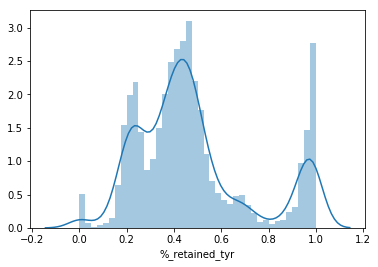

In [16]:
sns.distplot(dretained["%_retained_tyr"], bins=40)

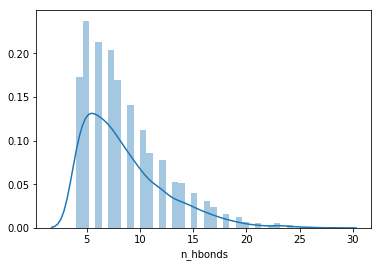

In [17]:
sns.distplot(dnetworks["n_hbonds"], bins=40)

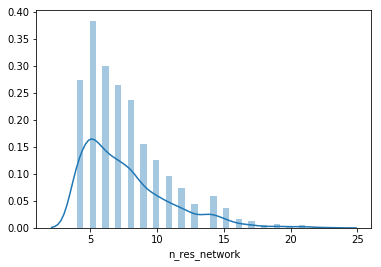

In [18]:
sns.distplot(dnetworks["n_res_network"], bins=40)

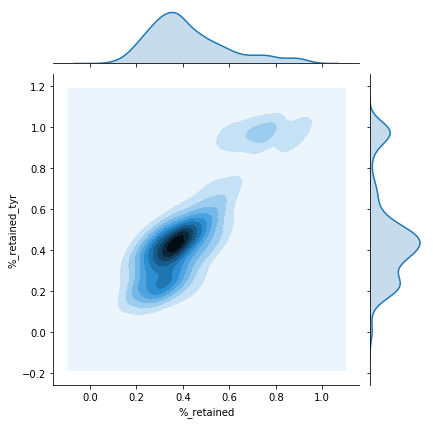

In [19]:
sns.jointplot("%_retained", "%_retained_tyr", dnetworks, kind='kde')

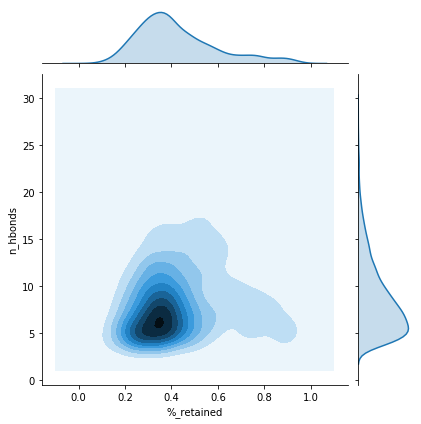

In [20]:
sns.jointplot("%_retained", "n_hbonds", dnetworks, kind='kde')

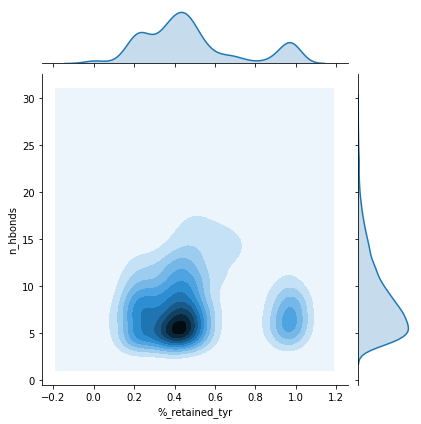

In [21]:
sns.jointplot("%_retained_tyr", "n_hbonds", dnetworks, kind='kde')

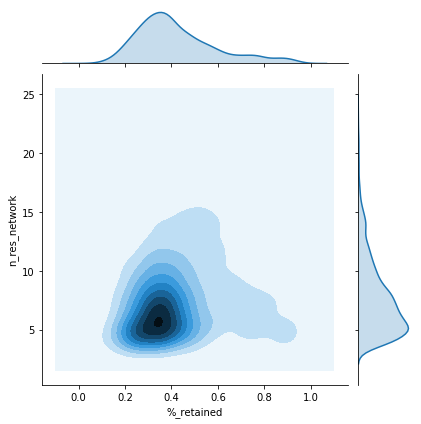

In [22]:
sns.jointplot("%_retained", "n_res_network", dnetworks, kind='kde')

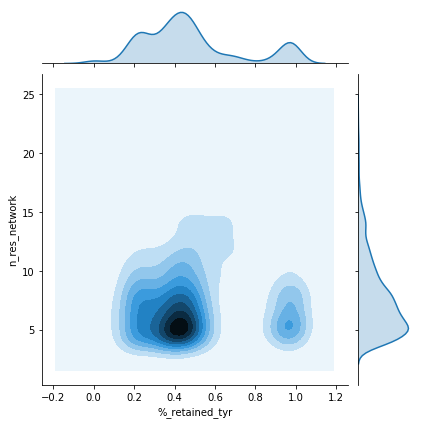

In [23]:
sns.jointplot("%_retained_tyr", "n_res_network", dnetworks, kind='kde')

In [88]:
dstable = dnetworks.loc[(dnetworks["%_retained_tyr"] >= 0.55)&(dnetworks["n_res_network"] >= 5)&(dnetworks["n_hbonds"] >= 4)&(dnetworks["%_retained"] >= 0.35)]
dstable.shape

(766, 6)

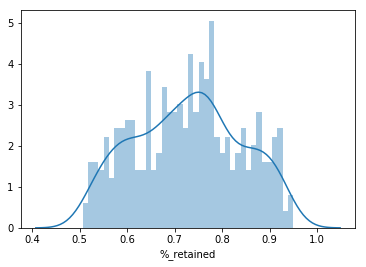

In [31]:
sns.distplot(dstable["%_retained"], bins=40)

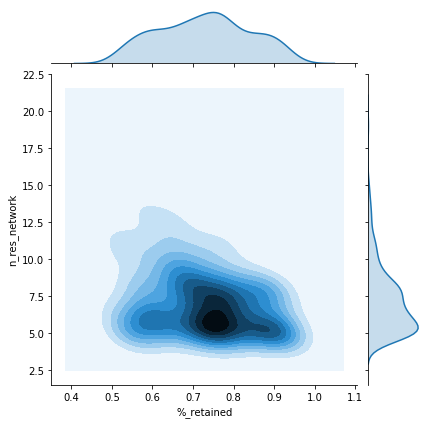

In [32]:
sns.jointplot("%_retained", "n_res_network", dstable, kind='kde')

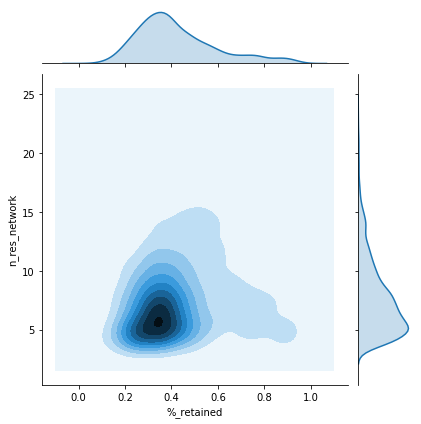

In [33]:
sns.jointplot("%_retained", "n_res_network", dnetworks, kind='kde')

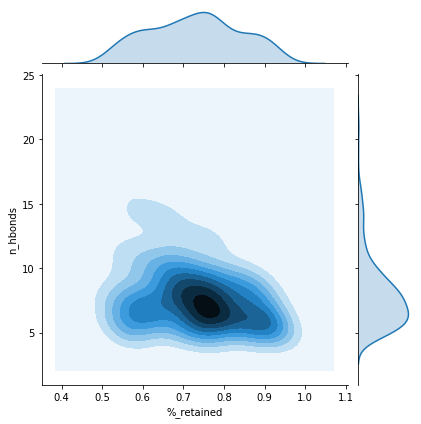

In [34]:
sns.jointplot("%_retained", "n_hbonds", dstable, kind='kde')

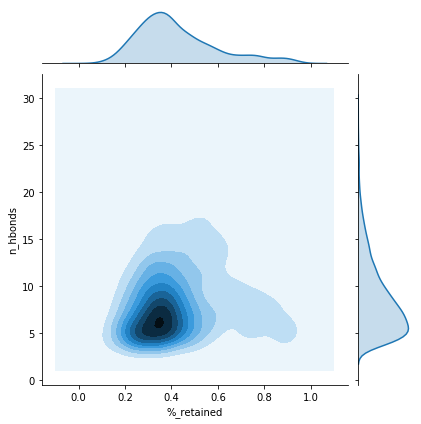

In [35]:
sns.jointplot("%_retained", "n_hbonds", dnetworks, kind='kde')

In [36]:
dstable.sort_values(by=['%_retained_tyr'])

,%_retained,%_retained_tyr,tyrs,n_res_network,n_hbonds,network_cst
description,,,,,,
96_input_0084_0003_22_0009_0002_0004,0.667409,0.750557,2.0,9.0,9.0,# 96_input_0084_0003_22_0009_0002_0004_0001_na...
100_input_0084_0003_13_0007_0008_0002,0.557203,0.756356,1.0,6.0,7.0,# 100_input_0084_0003_13_0007_0008_0002_0001_n...
52_input_0043_0003_14_0008_0007_0003,0.763415,0.758537,1.0,7.0,8.0,# 52_input_0043_0003_14_0008_0007_0003_0001_na...
64_input_0084_0002_8_0003_0010_0008,0.546737,0.759637,2.0,9.0,9.0,# 64_input_0084_0002_8_0003_0010_0008_0001_nat...
96_input_0084_0003_22_0009_0002_0007,0.527537,0.764851,2.0,14.0,16.0,# 96_input_0084_0003_22_0009_0002_0007_0001_na...
5_input_0036_0003_6_0008_0008_0003,0.562500,0.773810,1.0,5.0,6.0,# 5_input_0036_0003_6_0008_0008_0003_0001_nati...
63_input_0093_0004_13_0002_0006,0.558009,0.777273,2.0,19.0,21.0,# 63_input_0093_0004_13_0002_0006_0001_native_...
42_input_0055_0002_5_0010_0009_0002,0.623188,0.778032,1.0,5.0,6.0,# 42_input_0055_0002_5_0010_0009_0002_0001_nat...
1_input_0064_0001_6_0003_0005_0005,0.539147,0.778309,2.0,11.0,11.0,# 1_input_0064_0001_6_0003_0005_0005_0001_nati...


In [124]:
print(dstable.loc["100_input_0091_0001_2_0005_0010_0005"])

%_retained                                                 0.594215
%_retained_tyr                                             0.687374
tyrs                                                              3
n_res_network                                                    14
n_hbonds                                                         11
tyr38_n_res                                                       5
tyr38_n_hbond                                                     4
tyr94_n_res                                                       5
tyr94_n_hbond                                                     4
tyr150_n_res                                                      4
tyr150_n_hbond                                                    3
network_cst       # 100_input_0091_0001_2_0005_0010_0005_0001_na...
Name: 100_input_0091_0001_2_0005_0010_0005, dtype: object


In [91]:
picked_list = dstable.index.tolist()
#picked_names = df["description"].loc[picked_list].tolist()
dall_scores["design"] = dall_scores.description.apply(lambda x: "_".join(x.split("_")[:-1]))

dscore_picked = dall_scores.loc[dall_scores["design"].isin(picked_list)]
print(dscore_picked)

       SCORE:  total_score  angle_constraint  atom_pair_constraint  \
80     SCORE:    -1216.768               0.0                   0.0   
81     SCORE:    -1212.146               0.0                   0.0   
82     SCORE:    -1210.990               0.0                   0.0   
83     SCORE:    -1213.256               0.0                   0.0   
84     SCORE:    -1218.841               0.0                   0.0   
85     SCORE:    -1215.627               0.0                   0.0   
86     SCORE:    -1219.158               0.0                   0.0   
87     SCORE:    -1215.856               0.0                   0.0   
88     SCORE:    -1212.822               0.0                   0.0   
89     SCORE:    -1211.560               0.0                   0.0   
100    SCORE:    -1212.346               0.0                   0.0   
101    SCORE:    -1207.344               0.0                   0.0   
102    SCORE:    -1209.120               0.0                   0.0   
103    SCORE:    -12

In [38]:
dscore_picked[["omega","hbond_sc","hbond_lr_bb","rama_prepro","hbond_bb_sc"]].loc[dscore_picked["design"] == "100_input_0091_0001_2_0005_0010_0005"]

,omega,hbond_sc,hbond_lr_bb,rama_prepro,hbond_bb_sc


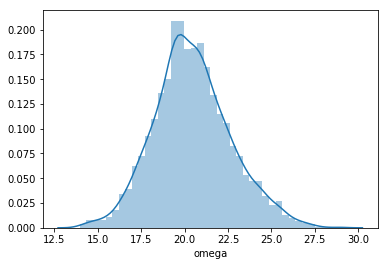

In [39]:
sns.distplot(dscore_picked["omega"], bins=40)

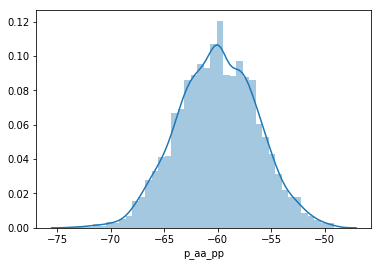

In [40]:
sns.distplot(dscore_picked["p_aa_pp"], bins=40)

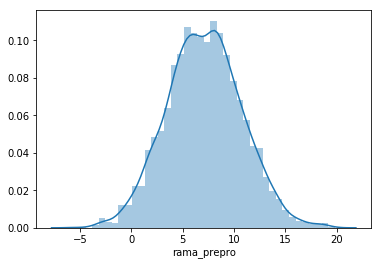

In [41]:
sns.distplot(dscore_picked["rama_prepro"], bins=40)

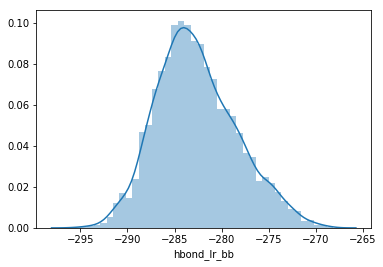

In [42]:
sns.distplot(dscore_picked["hbond_lr_bb"], bins=40)

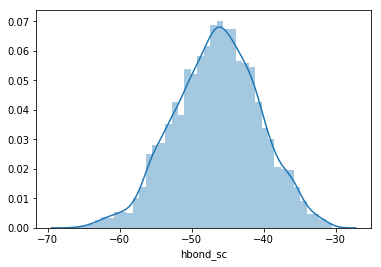

In [43]:
sns.distplot(dscore_picked["hbond_sc"], bins=40)

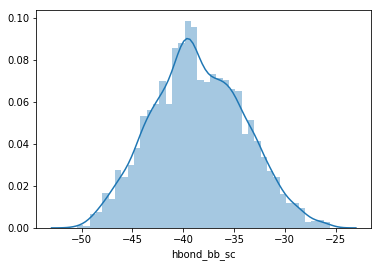

In [44]:
sns.distplot(dscore_picked["hbond_bb_sc"], bins=40)

In [92]:
#dpicked = dscore_picked.loc[(dscore_picked["hbond_sc"] < -34.0) & (dscore_picked["rama_prepro"] < 4) & (dscore_picked["hbond_lr_bb"] < -250) & (dscore_picked["hbond_bb_sc"] < -30)& (dscore_picked["omega"] < 23.6)]
dpicked = dscore_picked.loc[(dscore_picked["hbond_sc"] < -32.0) & (dscore_picked["rama_prepro"] < 13) & (dscore_picked["hbond_lr_bb"] < -277) & (dscore_picked["hbond_bb_sc"] < -30)& (dscore_picked["omega"] < 23)]
dpicked.shape

(5594, 26)

In [93]:
n = len(pd.unique(dpicked['design'])) 
print(n)

665


In [74]:
print(pd.unique(dpicked['design']))

['18_input_0048_0002_7_0002_0004_0004'
 '96_input_0084_0003_24_0001_0001_0006'
 '22_input_0009_0002_11_0001_0008_0003'
 '23_input_0025_0003_9_0010_0007_0002'
 '23_input_0025_0003_11_0003_0005_0004'
 '95_input_0029_0003_18_0010_0006_0005'
 '23_input_0025_0003_9_0010_0007_0010'
 '109_input_0001_0003_6_0008_0003_0010' '63_input_0040_0003_14_0010_0010'
 '9_input_0061_0002_19_0003_0005_0006'
 '96_input_0084_0003_24_0010_0008_0007'
 '9_input_0061_0002_9_0001_0005_0006'
 '32_input_0059_0005_10_0007_0001_0002'
 '21_input_0022_0002_7_0007_0004_0001'
 '96_input_0084_0003_22_0001_0004_0005'
 '82_input_0022_0004_13_0007_0009_0007' '75_input_0022_0004_8_0007_0005'
 '91_input_0049_0003_6_0008_0002_0001' '109_input_0001_0003_9_0007_0008'
 '9_input_0061_0001_11_0003_0010' '91_input_0049_0005_11_0008_0003_0008'
 '80_input_0083_0001_8_0010_0003' '52_input_0094_0002_8_0009_0007_0004'
 '96_input_0084_0003_21_0008_0009_0010' '64_input_0084_0002_10_0009_0007'
 '9_input_0061_0002_15_0008_0004_0007'
 '63_inpu

In [94]:
dpicked.to_pickle('networks_selected_for_round4.pickle')

In [ ]:
dpicked = pd.read_pickle('networks_selected_for_round4.pickle')
print(dpicked)

In [95]:
dpicked.groupby(['design'], sort=False)['omega'].min()

design
18_input_0048_0002_7_0002_0004_0004     16.726
82_input_0022_0004_13_0007_0009         16.109
52_input_0094_0001_8_0006_0003_0007     20.033
96_input_0084_0003_24_0001_0001_0006    17.456
22_input_0009_0002_11_0001_0008_0003    21.157
29_input_0031_0001_11_0007_0007_0010    19.186
23_input_0025_0003_9_0010_0007_0002     19.293
23_input_0025_0003_11_0003_0005_0004    16.772
95_input_0029_0003_18_0010_0006_0005    21.023
96_input_0084_0004_20_0009_0010_0001    20.919
23_input_0025_0003_9_0010_0007_0010     17.962
96_input_0084_0001_10_0004_0003_0010    18.281
109_input_0001_0003_6_0008_0003_0010    19.800
9_input_0061_0001_11_0007_0003          19.105
63_input_0040_0003_14_0010_0010         19.575
9_input_0061_0002_19_0003_0005_0006     19.481
64_input_0084_0001_10_0003_0004_0003    18.758
96_input_0084_0003_24_0010_0008_0007    20.650
9_input_0061_0002_9_0001_0005_0006      20.257
96_input_0084_0003_24_0009_0008_0003    17.703
60_input_0095_0001_7_0002_0006_0007     21.771
52_inp

In [96]:
idx = dpicked.groupby(['design'])['omega'].transform(min) == dpicked['omega']
df1 = dpicked[idx]
print(df1)

       SCORE:  total_score  angle_constraint  atom_pair_constraint  \
86     SCORE:    -1219.158               0.0                   0.0   
105    SCORE:    -1208.082               0.0                   0.0   
158    SCORE:    -1223.498               0.0                   0.0   
238    SCORE:    -1211.561               0.0                   0.0   
240    SCORE:    -1224.919               0.0                   0.0   
310    SCORE:    -1210.321               0.0                   0.0   
464    SCORE:    -1215.782               0.0                   0.0   
587    SCORE:    -1225.887               0.0                   0.0   
634    SCORE:    -1187.549               0.0                   0.0   
700    SCORE:    -1205.345               0.0                   0.0   
748    SCORE:    -1220.171               0.0                   0.0   
753    SCORE:    -1208.321               0.0                   0.0   
771    SCORE:    -1232.253               0.0                   0.0   
826    SCORE:    -11

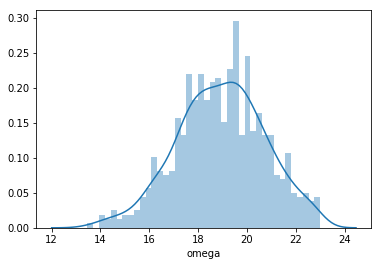

In [97]:
sns.distplot(df1["omega"], bins=40)

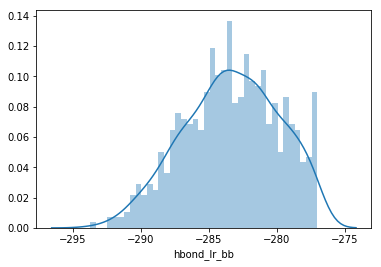

In [98]:
sns.distplot(df1["hbond_lr_bb"], bins=40)

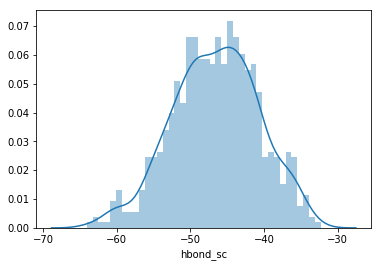

In [99]:
sns.distplot(df1["hbond_sc"], bins=40)

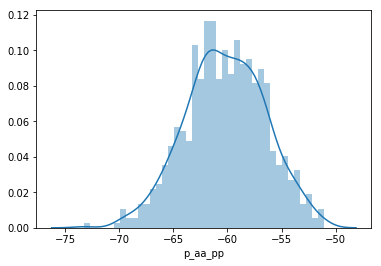

In [100]:
sns.distplot(df1["p_aa_pp"], bins=40)

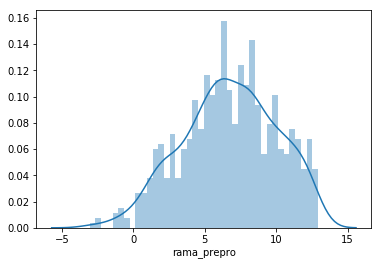

In [101]:
sns.distplot(df1["rama_prepro"], bins=40)

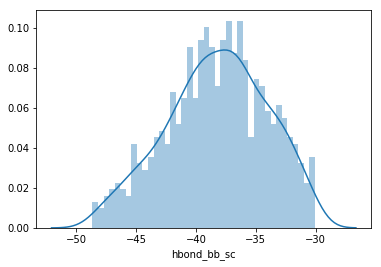

In [102]:
sns.distplot(df1["hbond_bb_sc"], bins=40)

In [103]:
from shutil import copyfile

for index,row in df1.iterrows():
    pdb = row['description'] + ".pdb"
    source = row['design'] + '/' + pdb
    target = "../round4_surf_B/" + pdb
    copyfile(source, target)